# Initialization

In [14]:
import pickle,gzip,math,os,time,shutil,torch,matplotlib as mpl,numpy as np,matplotlib.pyplot as plt
import sys,gc,traceback
import fastcore.all as fc
from collections.abc import Mapping

from pathlib import Path
from operator import attrgetter,itemgetter
from functools import partial
from copy import copy
from contextlib import contextmanager

import torchvision.transforms.functional as TF,torch.nn.functional as F
from torch import tensor,nn,optim
from torch.utils.data import DataLoader,default_collate
from torch.nn import init
from torcheval.metrics import MulticlassAccuracy
from datasets import load_dataset,load_dataset_builder

from miniai.datasets import *
from miniai.conv import *
from miniai.learner import *
from miniai.activations import *

In [15]:
from fastcore.test import test_close

torch.set_printoptions(precision=2, linewidth=140, sci_mode=False)
torch.manual_seed(1)

import logging
logging.disable(logging.WARNING)

set_seed(42)

In [16]:
xl, yl = 'image', 'label'
name = 'fashion_mnist'
dsd = load_dataset(name)

@inplace
def transformi(b):
    b[xl] = [TF.to_tensor(o) for o in b[xl]]
    
bs = 1024
tds = dsd.with_transform(transformi)

dls = DataLoaders.from_dd(tds, bs, num_workers=10)
dt = dls.train
xb, yb = next(iter(dt))
xb.shape, yb[:10]

[W ParallelNative.cpp:230] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:230] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:230] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:230] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNative.cpp:230] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)
[W ParallelNati

(torch.Size([1024, 1, 28, 28]), tensor([5, 7, 4, 7, 3, 8, 9, 5, 3, 1]))

In [17]:
def get_model():
    return nn.Sequential(conv(1,8), conv(8, 16), conv(16, 32), conv(32, 64),
                         conv(64, 10, act=False), nn.Flatten()).to(def_device)

[W ParallelNative.cpp:230] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)


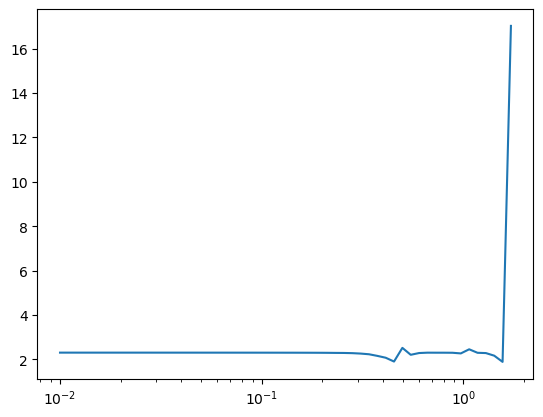

In [5]:
MomentumLearner(get_model(), dls, F.cross_entropy, cbs=[DeviceCB()]).lr_find(gamma=1.1, start_lr=1e-2)

In [6]:
metrics = MetricsCB(accuracy=MulticlassAccuracy())
astats = ActivationStats(fc.risinstance(nn.ReLU))
cbs = [DeviceCB(), metrics, ProgressCB(plot=True), astats]
learn = MomentumLearner(get_model(), dls, F.cross_entropy, lr=0.2, cbs=cbs)

In [7]:
learn.fit()

[W ParallelNative.cpp:230] Warning: Cannot set number of intraop threads after parallel work has started or after set_num_threads call when using native parallel backend (function set_num_threads)


<miniai.learner.MomentumLearner object at 0x28a0d2650> <miniai.activations.Hook object at 0x28d17ac10> ReLU() (tensor([[[[     0.00,      0.00,      0.00,  ...,      0.00,      0.00,      0.00],
          [     0.00,      0.00,      0.00,  ...,      0.00,     -0.00,      0.00],
          [     0.00,      0.00,     -0.00,  ...,     -0.12,      0.00,      0.00],
          ...,
          [     0.00,      0.12,      0.39,  ...,      0.72,      0.19,      0.00],
          [     0.00,      0.24,      0.48,  ...,      0.69,      0.18,      0.00],
          [     0.00,      0.20,      0.51,  ...,      0.43,      0.28,      0.00]],

         [[     0.00,      0.00,      0.00,  ...,      0.00,      0.00,      0.00],
          [     0.00,      0.00,      0.00,  ...,     -0.00,      0.00,      0.00],
          [     0.00,     -0.00,     -0.00,  ...,      0.00,      0.00,      0.00],
          ...,
          [     0.00,     -0.05,     -0.17,  ...,      0.07,      0.28,      0.00],
          [     0

AttributeError: 'tuple' object has no attribute 'mean'